In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
!pip install catboost

     |████████████████████████████████| 66.3MB 55kB/s 


In [3]:
train_data=pd.read_csv('/content/drive/MyDrive/CMPE 255/Group Project/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/CMPE 255/Group Project/test.csv')

In [4]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train_data.shape

(381109, 12)

In [6]:
train_data = train_data.drop(['id'], axis=1)
test_data = test_data.drop(['id'], axis=1)

In [7]:
train_data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

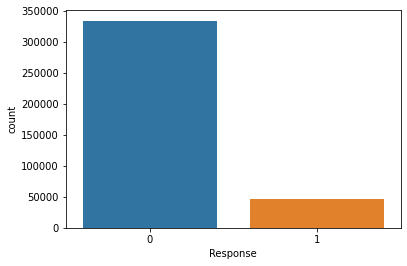

In [8]:
sns.countplot(train_data['Response'])

In [9]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
            'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes',
            'Region_Code','Policy_Sales_Channel']

In [10]:
train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
#Converting The categorical feature 'Gender' to a binary variable. Can be done using get_dummies pandas as well
train_data.loc[train_data['Gender'] == 'Male', 'Gender'] = 1
train_data.loc[train_data['Gender'] == 'Female', 'Gender'] = 0
test_data.loc[test_data['Gender'] == 'Male', 'Gender'] = 1
test_data.loc[test_data['Gender'] == 'Female', 'Gender'] = 0

In [12]:
#Converting the categorical feature Vehical age to numerical
train_data.loc[train_data['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
train_data.loc[train_data['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
train_data.loc[train_data['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

test_data.loc[test_data['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
test_data.loc[test_data['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
test_data.loc[test_data['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

In [13]:
#Converting the categorical feature Vehical Damage to numerical
train_data.loc[train_data['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
train_data.loc[train_data['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
test_data.loc[test_data['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
test_data.loc[test_data['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

In [14]:
for col in train_data.columns:
    train_data[col] = train_data[col].astype(np.int32)

In [15]:
for col in train_data.columns:
    if col == 'Response':
        continue
    print(col, train_data[col].corr(train_data['Response']))

Gender 0.05243991377134205
Age 0.11114689471251019
Driving_License 0.01015517459407371
Region_Code 0.01056985561522313
Previously_Insured -0.34117046261352385
Vehicle_Age 0.2218739872179906
Vehicle_Damage 0.35439954387975453
Annual_Premium 0.022574695542560037
Policy_Sales_Channel -0.139041500829161
Vintage -0.0010503720019898887


In [16]:
from sklearn.utils import resample,shuffle
train_majority = train_data[train_data['Response']==0]
train_minority = train_data[train_data['Response']==1]
train_majority_downsampled = resample(train_majority,replace=False,n_samples=46710)

In [17]:
balanced_train_data = pd.concat([train_minority,train_majority_downsampled])
balanced_train_data = shuffle(balanced_train_data)
balanced_train_data.Response.value_counts()

1    46710
0    46710
Name: Response, dtype: int64

In [18]:
balanced_train_data.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,93420.000000,93420.000000,93420.000000,93420.00000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000
mean,0.571794,40.769461,0.998491,26.54894,0.261668,0.753575,0.709976,31056.177842,103.374010,154.078623,0.500000
std,0.494821,14.348837,0.038821,12.62923,0.439545,0.566838,0.453775,17950.232459,55.892162,83.670891,0.500003
min,0.000000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,27.000000,1.000000,16.00000,0.000000,0.000000,0.000000,24648.000000,26.000000,82.000000,0.000000
50%,1.000000,41.000000,1.000000,28.00000,0.000000,1.000000,1.000000,32239.000000,124.000000,154.000000,0.500000
75%,1.000000,50.000000,1.000000,34.00000,1.000000,1.000000,1.000000,40254.250000,152.000000,226.000000,1.000000
max,1.000000,85.000000,1.000000,52.00000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [19]:
balanced_train_data.shape

(93420, 11)

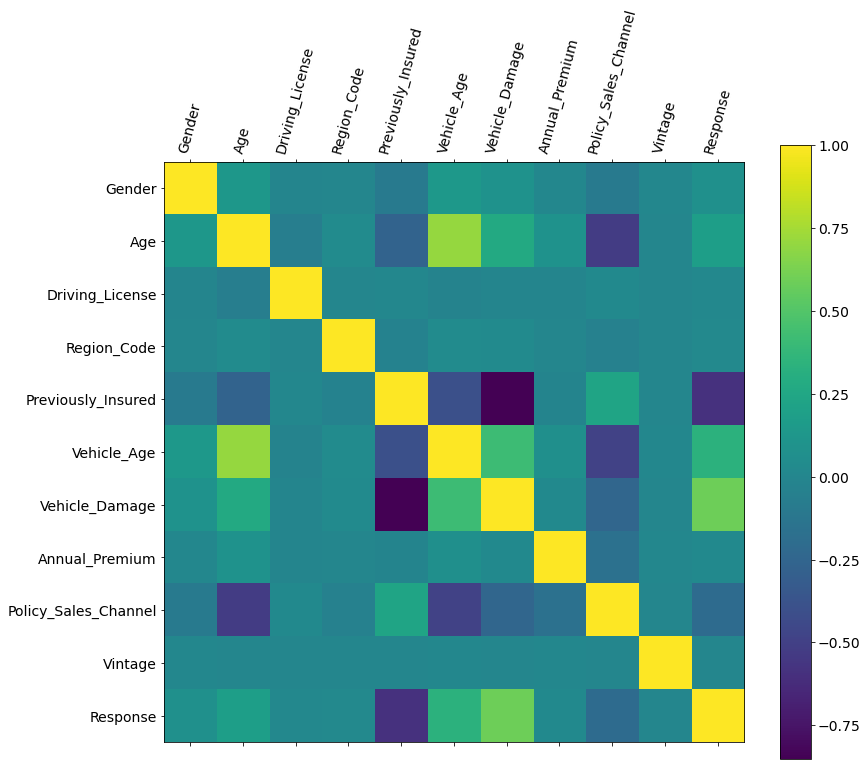

In [20]:
f = plt.figure(figsize=(13, 11))
plt.matshow(balanced_train_data.corr(), fignum=f.number)
plt.xticks(range(balanced_train_data.shape[1]), balanced_train_data.columns, fontsize=14, rotation=75)
plt.yticks(range(balanced_train_data.shape[1]), balanced_train_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Age distribution according to Response


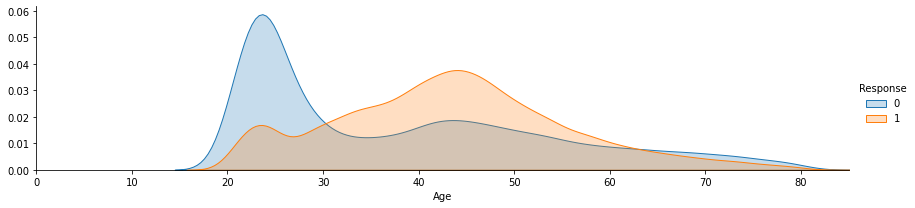

In [21]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(balanced_train_data,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,balanced_train_data["Age"].max()))
facetgrid.add_legend();

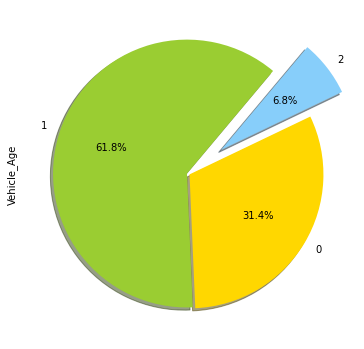

In [22]:
plt.rcParams['figure.figsize']=(6,8)
color = ['yellowgreen','gold',"lightskyblue"]
balanced_train_data['Vehicle_Age'].value_counts().plot.pie(y="Vehicle_Age",colors=color,explode=(0.02,0,0.3),startangle=50,shadow=True,autopct="%0.1f%%")
plt.axis('on');

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
scale = StandardScaler()
balanced_train_data[num_feat] = scale.fit_transform(balanced_train_data[num_feat])

In [25]:
test_data[num_feat] = scale.fit_transform(test_data[num_feat])

In [26]:
min_max = MinMaxScaler()
balanced_train_data[['Annual_Premium']] = min_max.fit_transform(balanced_train_data[['Annual_Premium']])

In [27]:
test_data[['Annual_Premium']] = min_max.fit_transform(test_data[['Annual_Premium']])

In [28]:
balanced_train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
2004,1,1.409916,1,22,1,1,0,0.044998,124,-1.088540,0
324660,0,-0.959627,1,35,0,0,0,0.065640,160,0.417368,0
376669,1,-1.238397,1,8,0,0,1,0.067880,152,-0.239973,1
362624,0,0.922068,1,28,0,1,1,0.000000,157,1.158371,1
334855,1,0.503914,1,46,0,1,1,0.100591,124,-0.263876,1


In [29]:
test_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,-0.890089,1,11.0,1,0,0,0.070633,152.0,-1.211054
1,1,0.079795,1,28.0,0,1,1,0.066321,7.0,-0.517782
2,1,0.532408,1,28.0,0,1,1,0.079717,124.0,0.534079
3,1,-0.954748,1,27.0,1,0,1,0.073978,152.0,0.390643
4,1,-0.760771,1,28.0,1,0,0,0.120293,152.0,1.705469


In [30]:
cat_col=['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

In [32]:
q3 =balanced_train_data['Annual_Premium'].quantile(0.75)
q1=balanced_train_data['Annual_Premium'].quantile(0.25)

In [33]:
iqr=q3-q1

upper_boundary=q3+(1.5*iqr)
lower_boundary=q1-(1.5*iqr)

In [35]:
train_new=balanced_train_data[balanced_train_data['Annual_Premium']>=lower_boundary]
train_new=train_new[train_new['Annual_Premium']<=upper_boundary]

In [39]:
train_new.shape


(91005, 11)

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import classification_report

In [41]:
X = train_new.drop(['Response'],axis=1)

In [42]:
y = train_new['Response']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42,stratify=y,shuffle=True)

In [44]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(learning_rate=0.03, l2_leaf_reg=1, iterations= 1000, depth= 9, border_count= 20,eval_metric = 'AUC')

cat= cat.fit(X_train, y_train,cat_features=cat_col,eval_set=(X_test, y_test),early_stopping_rounds=70,verbose=50)

pred_proba = cat.predict_proba(X_test)[:, 1]
print('CatBoost ROC AUC SCORE: {}'.format(roc_auc_score(y_test,pred_proba)))


0:	test: 0.8407583	best: 0.8407583 (0)	total: 187ms	remaining: 3m 7s
50:	test: 0.8561894	best: 0.8561894 (50)	total: 5.18s	remaining: 1m 36s
100:	test: 0.8590510	best: 0.8590510 (100)	total: 10.5s	remaining: 1m 33s
150:	test: 0.8598720	best: 0.8598720 (150)	total: 15.9s	remaining: 1m 29s
200:	test: 0.8599680	best: 0.8600573 (192)	total: 20.9s	remaining: 1m 23s
250:	test: 0.8600825	best: 0.8600825 (250)	total: 25.6s	remaining: 1m 16s
300:	test: 0.8599377	best: 0.8600847 (251)	total: 30.9s	remaining: 1m 11s
Stopped by overfitting detector  (70 iterations wait)

bestTest = 0.8600847299
bestIteration = 251

Shrink model to first 252 iterations.
CatBoost ROC AUC SCORE: 0.860084729892414


In [45]:
y_pred = cat.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78     11407
           1       0.74      0.93      0.83     11345

    accuracy                           0.80     22752
   macro avg       0.82      0.80      0.80     22752
weighted avg       0.82      0.80      0.80     22752



In [46]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(boosting_type='gbdt',n_estimators=100,depth=10,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)

lgb= lgb.fit(X_train, y_train,eval_metric='auc',eval_set=(X_test , y_test),verbose=50,categorical_feature=cat_col,early_stopping_rounds= 50)


pred_proba = lgb.predict_proba(X_test)[:, 1]
print('Lightgbm ROC AUC SCORE: {}'.format(roc_auc_score(y_test, pred_proba)))

Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.857477
[100]	valid_0's auc: 0.858302
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.858307
Lightgbm ROC AUC SCORE: 0.8583073540510004


In [47]:
y_pred_lgb = lgb.predict(X_test)
print(classification_report(y_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78     11407
           1       0.74      0.93      0.82     11345

    accuracy                           0.80     22752
   macro avg       0.82      0.80      0.80     22752
weighted avg       0.82      0.80      0.80     22752



In [ ]:
param = { 'depth':[3,1,2,6,4,8,9,10,20,30,50],
         'iterations':[250,100,500,1000],
         'learning_rate':[0.03,0.001,0.01,0.1,0.13,0.2,0.3],
         'l2_leaf_reg':[3,1,5,10,100],
         'border_count':[32,5,10,20,100,200]
        }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

randm = RandomizedSearchCV(cat, param_distributions = param, cv=5,refit = True,n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",randm.best_params_)

0:	total: 28.6ms	remaining: 7.13s
1:	total: 56ms	remaining: 6.95s
2:	total: 82.9ms	remaining: 6.83s
3:	total: 110ms	remaining: 6.77s
4:	total: 137ms	remaining: 6.73s
5:	total: 164ms	remaining: 6.69s
6:	total: 189ms	remaining: 6.57s
7:	total: 216ms	remaining: 6.55s
8:	total: 244ms	remaining: 6.54s
9:	total: 268ms	remaining: 6.42s
10:	total: 295ms	remaining: 6.4s
11:	total: 322ms	remaining: 6.39s
12:	total: 356ms	remaining: 6.5s
13:	total: 379ms	remaining: 6.39s
14:	total: 400ms	remaining: 6.27s
15:	total: 426ms	remaining: 6.24s
16:	total: 457ms	remaining: 6.27s
17:	total: 480ms	remaining: 6.19s
18:	total: 505ms	remaining: 6.14s
19:	total: 531ms	remaining: 6.11s
20:	total: 553ms	remaining: 6.03s
21:	total: 581ms	remaining: 6.02s
22:	total: 608ms	remaining: 6s
23:	total: 634ms	remaining: 5.97s
24:	total: 665ms	remaining: 5.98s
25:	total: 687ms	remaining: 5.92s
26:	total: 713ms	remaining: 5.89s
27:	total: 740ms	remaining: 5.87s
28:	total: 766ms	remaining: 5.84s
29:	total: 789ms	remaining: 

In [48]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(learning_rate=0.3, l2_leaf_reg=10, iterations= 250, depth= 4, border_count= 32,eval_metric = 'AUC')

cat= cat.fit(X_train, y_train,cat_features=cat_col,eval_set=(X_test, y_test),early_stopping_rounds=70,verbose=50)

pred_proba = cat.predict_proba(X_test)[:, 1]
print('CatBoost ROC AUC SCORE: {}'.format(roc_auc_score(y_test,pred_proba)))

0:	test: 0.8233782	best: 0.8233782 (0)	total: 74.1ms	remaining: 18.4s
50:	test: 0.8595783	best: 0.8595785 (49)	total: 3.02s	remaining: 11.8s
100:	test: 0.8594313	best: 0.8596544 (61)	total: 5.83s	remaining: 8.6s
Stopped by overfitting detector  (70 iterations wait)

bestTest = 0.8596543577
bestIteration = 61

Shrink model to first 62 iterations.
CatBoost ROC AUC SCORE: 0.8596543577368525
